In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df= pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# NUMERIC Columns
cols = ['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']

# Initalize and Fit the Scaler
ss = StandardScaler()
ss.fit(df.loc[:, cols])

# Transform the Data to created Scaled DF
df_sc = pd.DataFrame(ss.transform(df.loc[:, cols]), columns=cols, index=df.index) # use coin_id as index
df_sc.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


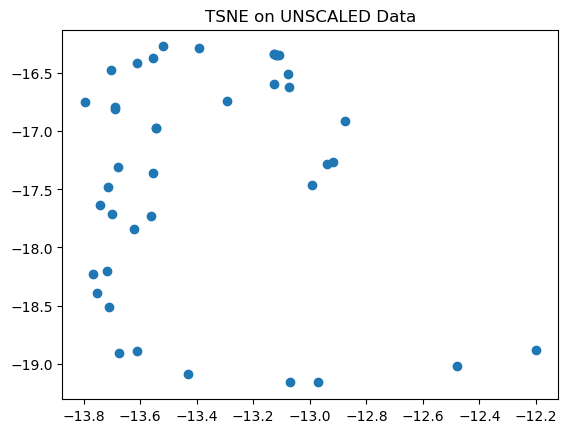

In [7]:
#Going to try that TSNE for Unscaled Data
#Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df.loc[:, cols])) # fit UNSCALED data

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1])
plt.title("TSNE on UNSCALED Data")
plt.show()



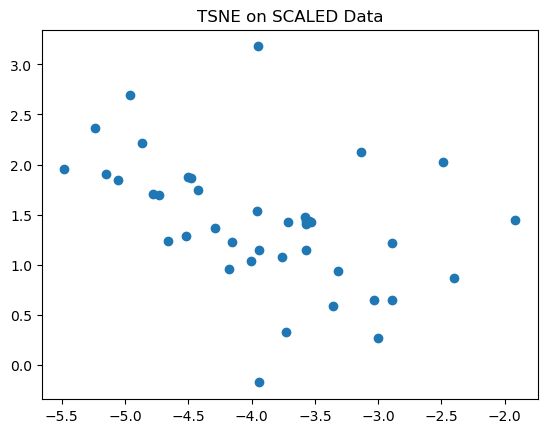

In [8]:
# Can this even be clustered? (On scaled Data)
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_sc)) # fit SCALED data

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1])
plt.title("TSNE on SCALED Data")
plt.show()

In [9]:
#Scaled Data is a little bit better, but not much

In [10]:
# Correlations
corrs = df_sc.corr()
corrs

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,1.000000,0.169659,0.279682,0.292563,0.136974,-0.541190,-0.750630
price_change_percentage_7d,0.169659,1.000000,0.538294,0.056899,-0.145099,-0.052533,-0.038424
price_change_percentage_14d,0.279682,0.538294,1.000000,0.658040,0.376108,-0.039086,-0.116632
price_change_percentage_30d,0.292563,0.056899,0.658040,1.000000,0.745248,0.324777,0.016078
price_change_percentage_60d,0.136974,-0.145099,0.376108,0.745248,1.000000,0.499102,0.211242
price_change_percentage_200d,-0.541190,-0.052533,-0.039086,0.324777,0.499102,1.000000,0.879873
price_change_percentage_1y,-0.750630,-0.038424,-0.116632,0.016078,0.211242,0.879873,1.000000


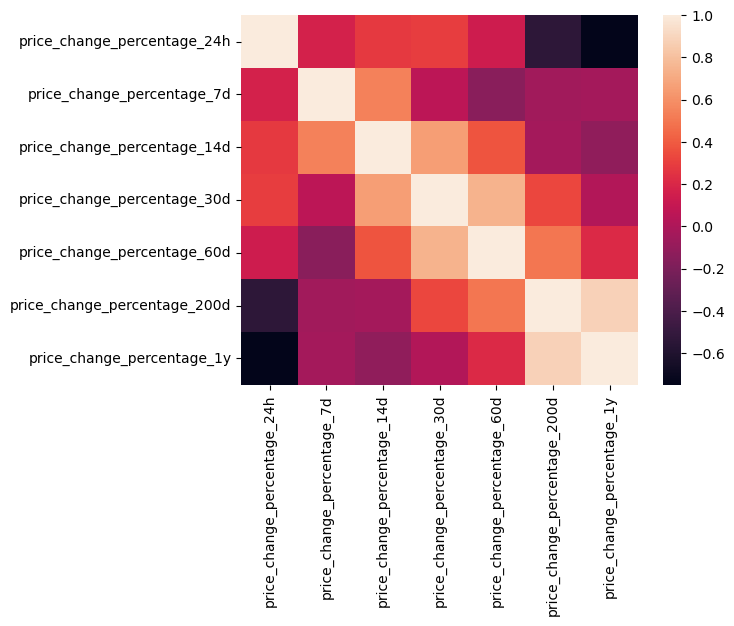

In [11]:
sns.heatmap(corrs)
plt.show()

In [12]:
#We have multicolinearity, bottom line

---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [13]:
# Define your "X" - features to predict
X = df_sc

In [14]:
# Create a list with the number of k-values from 1 to 11

# Create a a list to store inertia values and the values of k
inertia = []
s_scores = []
vrc_scores = []

k = list(range(2, 10))

In [15]:
#Fit the KMeans model with Silhoutte Score and VRC
# LOOP 
for i in k:
    # Fit the Model
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

    # Silhoutte Score
    preds = k_model.predict(X)
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "inertia": inertia, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,inertia,s_score,vrc_scores
0,2,212.123342,0.690885,13.766470
1,3,165.136752,0.260810,14.021117
2,4,79.022435,0.314482,32.459853
3,5,66.413051,0.323913,29.892958
4,6,61.634088,0.251616,25.595599
5,7,46.074467,0.258868,29.631263
6,8,43.392694,0.252185,26.466078
7,9,32.913223,0.260185,30.879599


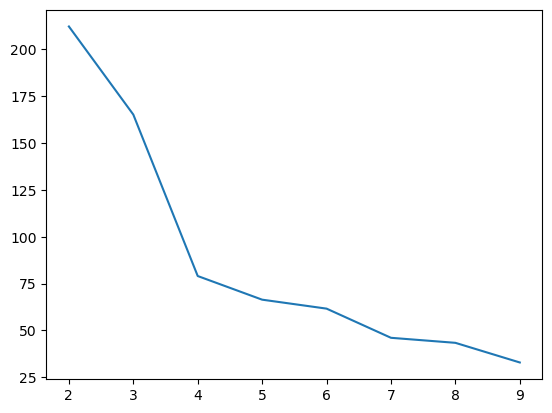

In [16]:
#Plot the elbow curve:
plt.plot(df_metrics.k, df_metrics.inertia)
plt.show()

In [17]:
#The elbow shows a good k=4

In [18]:
#Aggolomerative 
# Create a a list to store metric values and the values of k
s_scores = []
vrc_scores = []

k = list(range(2, 20))

# LOOP 
for i in k:
    # Fit the Model
    model = AgglomerativeClustering(n_clusters=i)
    model.fit(X)

    # Silhoutte Score
    preds = model.labels_  # FIX: Use `labels_` instead of `predict()`
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "s_score": s_scores, "vrc_scores": vrc_scores}
df_agg_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_agg_metrics.head(10)

,k,s_score,vrc_scores
0,2,0.707392,18.399507
1,3,0.702822,25.264783
2,4,0.340837,28.413892
3,5,0.276114,30.023823
4,6,0.277295,29.858770
5,7,0.276363,30.467052
6,8,0.198534,31.166776
7,9,0.201693,30.667151
8,10,0.199804,31.005396
9,11,0.206917,31.424703


In [19]:
#Aggomerative k=4 isn't bad, but going for kmeans 

#### Answer the following question: 

**Question:** What is the best value for `k`?

**4:** 

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [20]:
# Initialize the K-Means model using the best value for k
df_sub = X.copy()

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
df_sub['clusters'] = preds

df_sub.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


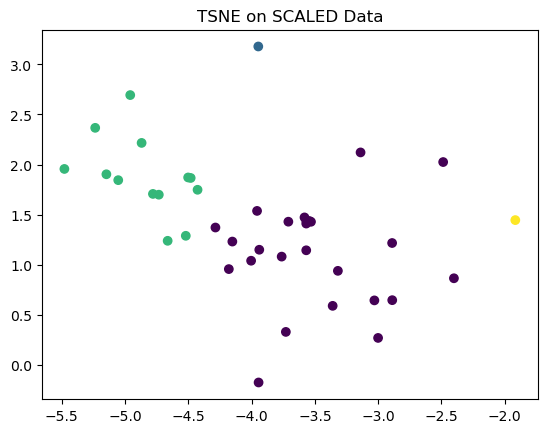

In [21]:
# Fit the K-Means model using the scaled DataFrame
# Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_sc)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("TSNE on SCALED Data")
plt.show()

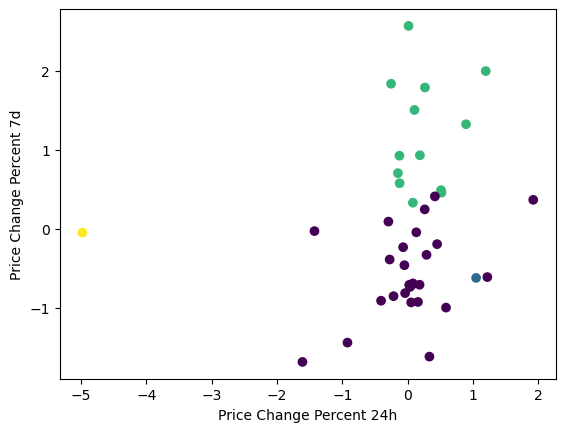

In [22]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
# Plot the clusters
plt.scatter(df_sub.price_change_percentage_24h, df_sub.price_change_percentage_7d, c=df_sub.clusters)
plt.ylabel("Price Change Percent 7d")
plt.xlabel("Price Change Percent 24h")
plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [23]:
# Create a PCA model instance and set `n_components=3`.
# We have multi-collinearity

# Init PCA
n_components = len(df_sc.columns)
pca = PCA(n_components=n_components)

# Fit the PCA model on the preprocessed DataFrame
pca_data = pca.fit_transform(df_sc)
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])

df_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
0,-0.600667,0.842760,0.461595,-0.109151,-0.033786,0.225703,0.006595
1,-0.458261,0.458466,0.952877,0.095100,0.014588,-0.034158,0.109593
2,-0.433070,-0.168126,-0.641752,-0.470282,0.115300,0.127710,-0.086857
3,-0.471835,-0.222660,-0.479053,-0.737473,-0.148641,0.273472,0.134870
4,-1.157800,2.041209,1.859715,0.236479,-0.191787,0.411513,-0.070411


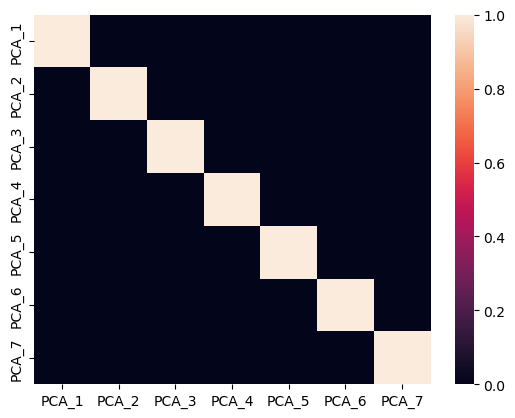

In [24]:
 # sanity check
corrs = df_pca.corr()
sns.heatmap(corrs)
plt.show()

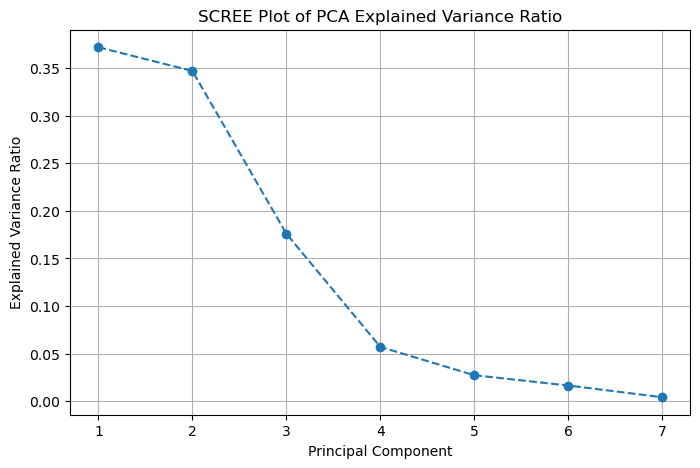

In [25]:
# See if dimensionality reduction will help

# Assume pca.explained_variance_ratio_ is already computed
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame from the explained variance ratio
df2 = pd.DataFrame({
    'Principal Component': range(1, n_components + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(df2['Principal Component'], df2['Explained Variance Ratio'], marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('SCREE Plot of PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

In [26]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
sum(pca.explained_variance_ratio_[0:4]) # 4 components make up 95% of the variance 

0.9520883911037915

In [27]:
sum(pca.explained_variance_ratio_[0:3]) # 3 components make up 89% of the variance 

0.895031657030984

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**0.895031657030984:** 

In [28]:
# Create a new DataFrame with the PCA data.
df_pca = df_pca.loc[:, ["PCA_1", "PCA_2", "PCA_3"]]
df_pca.head()


,PCA_1,PCA_2,PCA_3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


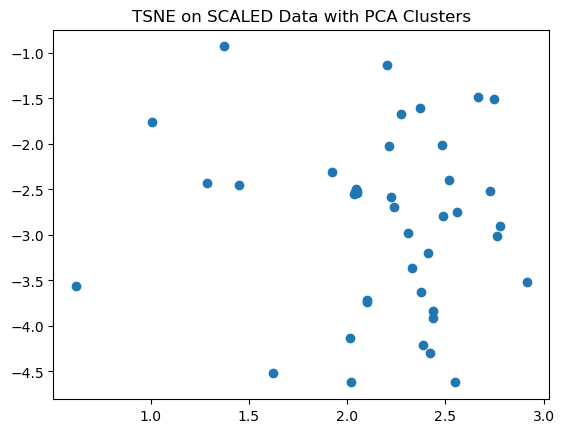

In [29]:
 # Plot the clusters
# Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_pca)) # fit scaled data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1]) # color off of the PCA
plt.title("TSNE on SCALED Data with PCA Clusters")
plt.show()

---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [30]:
# Create a list with the number of k-values from 1 to 11
# Define your "X" - features to predict
X = df_pca

inertia = []
s_scores = []
vrc_scores = []

k = list(range(2, 10))

In [31]:
#Fit the KMeans model with Silhoutte Score and VRC
# LOOP 
for i in k:
    # Fit the Model
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

    # Silhoutte Score
    preds = k_model.predict(X)
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "inertia": inertia, "s_score": s_scores, "vrc_scores": vrc_scores}
df_pca_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_pca_metrics.head(10)



,k,inertia,s_score,vrc_scores
0,2,182.339530,0.728406,15.941950
1,3,135.442408,0.356130,17.034560
2,4,49.665497,0.420800,51.455694
3,5,38.672582,0.405662,50.780512
4,6,34.507577,0.334511,45.107936
5,7,23.728365,0.375378,55.678472
6,8,18.574523,0.316385,60.481348
7,9,15.572672,0.323751,61.980734


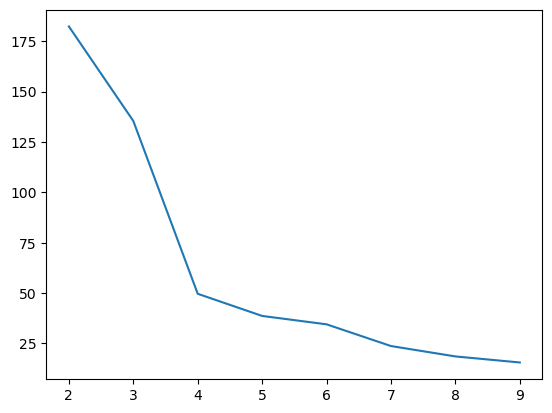

In [32]:
#Plot the elbow curve:
plt.plot(df_pca_metrics.k, df_pca_metrics.inertia)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **4:**


* **Question:** Does it differ from the best k value found using the original data?

  * **No:** 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [33]:
# Initialize the K-Means model using the best value for k
df_sub = X.copy()

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
df_sub['clusters'] = preds

df_sub.head()

,PCA_1,PCA_2,PCA_3,clusters
0,-0.600667,0.842760,0.461595,2
1,-0.458261,0.458466,0.952877,2
2,-0.433070,-0.168126,-0.641752,0
3,-0.471835,-0.222660,-0.479053,0
4,-1.157800,2.041209,1.859715,2


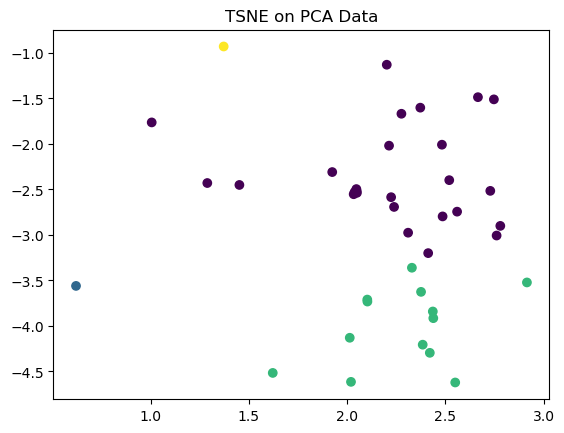

In [34]:
# Create a copy of the scaled PCA DataFrame
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_pca)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("TSNE on PCA Data")
plt.show()



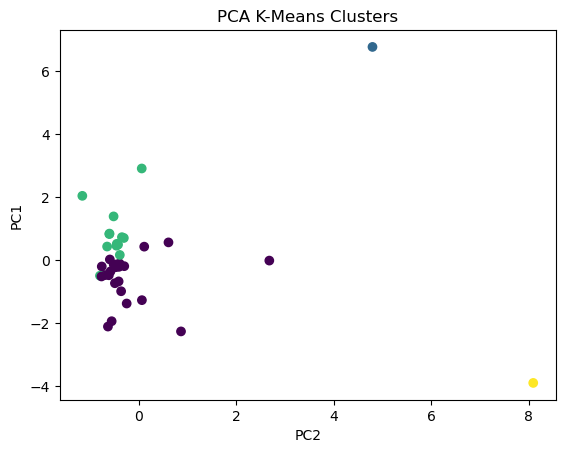

In [35]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
plt.scatter(df_pca.PCA_1, df_pca.PCA_2, c=df_sub.clusters)
plt.ylabel("PC1")
plt.xlabel("PC2")
plt.title("PCA K-Means Clusters")
plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

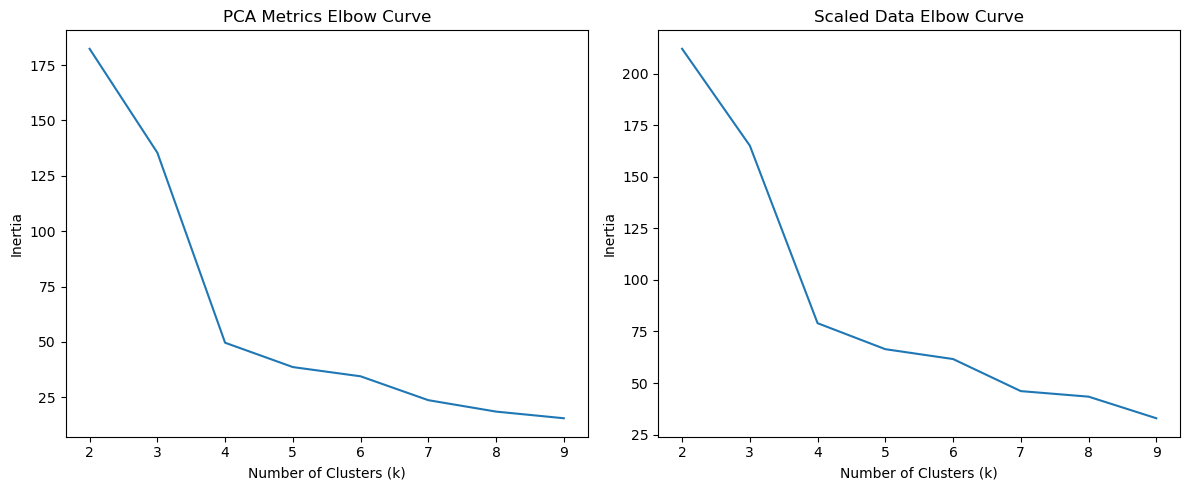

In [37]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot the first elbow curve
axes[0].plot(df_pca_metrics.k, df_pca_metrics.inertia)
axes[0].set_title("PCA Metrics Elbow Curve")
axes[0].set_xlabel("Number of Clusters (k)")
axes[0].set_ylabel("Inertia")

# Plot the second elbow curve
axes[1].plot(df_metrics.k, df_metrics.inertia)
axes[1].set_title("Scaled Data Elbow Curve")
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Inertia")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#Thanks ChatGPT

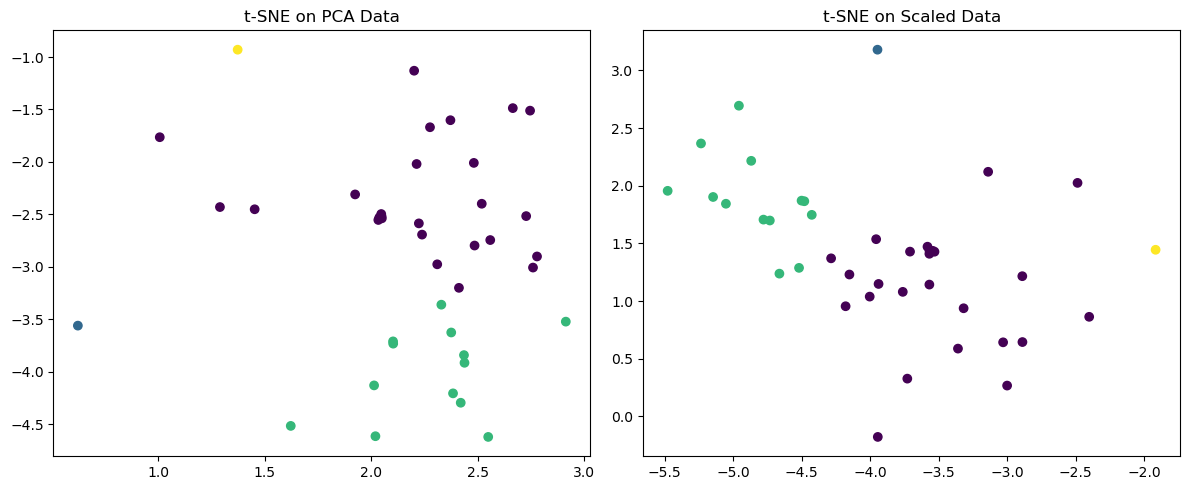

In [38]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

# Create t-SNE on PCA Data
tsne_pca = TSNE(random_state=42)
df_tsne_pca = pd.DataFrame(tsne_pca.fit_transform(df_pca))  # fit SCALED PCA data

# Create t-SNE on Scaled Data
tsne_scaled = TSNE(random_state=42)
df_tsne_scaled = pd.DataFrame(tsne_scaled.fit_transform(df_sc))  # fit SCALED data

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot t-SNE on PCA data
scatter1 = axes[0].scatter(df_tsne_pca[0], df_tsne_pca[1], c=df_sub.clusters, cmap="viridis")
axes[0].set_title("t-SNE on PCA Data")

# Plot t-SNE on Scaled data
scatter2 = axes[1].scatter(df_tsne_scaled[0], df_tsne_scaled[1], c=df_sub.clusters, cmap="viridis")
axes[1].set_title("t-SNE on Scaled Data")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

#Thanks ChatGPT

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **The clusters on the PCA data are tighter and the outliers show up clearer.  On the orginal data set our outlies are less apparent in the clusters. The PCA analysis is preferred. :** 